# Fundamental of Image Processing

Phần này giới thiệu một số khái niệm cơ bản về xử lý ảnh, thao tác với hình ảnh dùng Python

Tham khảo:

- [Giới thiệu về xử lý ảnh](https://nttuan8.com/bai-5-gioi-thieu-ve-xu-ly-anh/)
- [Kernel (image processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))


## 1. Hệ màu RGB

Ảnh trong máy tính được biểu diễn dưới dạng hệ màu RGB. Gồm 3 màu: Red (Đỏ), Green (Xanh lá), Blue (Xanh dương). Khi trộn 3 màu này với tỉ lệ nhất định sẽ tạo ra các màu khác nhau.

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/RGB.png?w=1400&ssl=1)

**Pixel** là 1 đơn vị cơ bản nhất để tạo thành ảnh kỹ thuật số. Pixel trong hệ RGB được biểu diễn bằng 3 số nguyên r, g, b trong khoảng từ \[0, 255\]. tổng số màu có thể biểu diễn là $256*256*256=16.777.216$

Kích thước ảnh được đo bằng chiều dài x chiều rộng. VD: một bức ảnh có chiều dài 800x600 sẽ được biểu diễn bằng ma trận pixel 600x800 (cần ôn lại kiến thức Đại số tuyến tính)

Để tiện cho việc xử lý ảnh, ta sẽ tách ma trận ra 3 **channel** mảu R, G, B. Mỗi channel là 1 ma trận chỉ chứa riêng giá trị của kênh màu đó.

**Vector** là dữ liệu có 1 chiều.

**Matrix** là dữ liệu có 2 chiều.

**Tensor** là dữ liệu có nhiều hơn 2 chiều.

Ảnh màu trên máy tính sẽ được biểu diễn dưới dạng **tensor 3 chiều** gồm chiều dài * chiều rộng * 3 kênh màu.



# 2. Ảnh xám

Mỗi pixel ảnh xám được biểu diễn bằng 1 giá trị từ 0 tới 255 để biểu diễn độ sáng. Vì vậy, ảnh xám chỉ cần dùng 1 ma trận là đủ.

![](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/03/gray.jpg?w=800&ssl=1)

Để chuyển từ ảnh màu sang ảnh xám, có thể dùng công thức:

$$L = \frac{299}{1000}R + \frac{587}{1000}G + \frac{114}{1000}B$$

# 3. Phép tích chập (Convolution)

## 3.1. Convolution

Cho ma trận ảnh $X$, ta định nghĩa **kernel** $W$ là ma trận vuông kích thước $k$ với $k$ lẻ.

Ta định nghĩa phép tích chập:

$$Y=X\otimes W$$

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/c1.png?w=939&ssl=1)

Cách tính như sau:

![](https://i1.wp.com/nttuan8.com/wp-content/uploads/2019/03/giphy.gif?w=1400&ssl=1)



## 3.2. Padding

Như phép tính trên, $Y$ thu được sẽ nhỏ hơn $X$, để thu được $Y$ có kích thước bằng $X$, ta thêm giá trị ở viền ngoài của ma trận.

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/c3.png?w=490&ssl=1)

Phép tính này là phép convolution với padding = 1. Với padding = k, ta thêm k vector 0 về mỗi phía của ma trận.

## 3.3. Stride

Ở ví dụ trên, nếu thực hiện tuần tự các phần tử trong X, thu được Y có kích thước bằng X, thì ta gọi là **stride = 1**.

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/c4.png?w=491&ssl=1)

Tuy nhiên nếu stride=k (k > 1) thì ta chỉ thực hiện phép tính convolution trên các phần tử $x_{1+i*k,1+j*k}$. 

Ví dụ k = 2. Kích thước ma trận Y đã giảm còn 3x3.

![](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/03/c5.png?w=492&ssl=1)

Công thức tổng quát cho phép tính convolution của ma trận X kích thước m*n với kernel kích thước k*k, stride = s, padding = p ra ma trận Y kích thước $\frac{m-k+2p}{s}+1) * (\frac{n-k+2p}{s}+1)$.

Stride thường dùng để giảm kích thước của ma trận sau phép tính convolution.

## 3.4. Ý nghĩa

Mục đích của phép tính convolution trên ảnh là làm mờ, làm nét ảnh; xác định các đường;… Mỗi kernel khác nhau thì sẽ phép tính convolution sẽ có ý nghĩa khác nhau. Ví dụ:

![](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/03/purpose.png?w=670&ssl=1)

# 4. Thao tác với hình ảnh

Có rất nhiều thư viện với những tính năng khác nhau, phần này sử dụng OpenCV để thao tác với hình ảnh.

```sh
pip install opencv-python
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 4.1. Load hình ảnh


In [3]:
path = "../data/images/image_1.jpg"

img = cv2.imread(path)

## 4.2. Xem thông tin hình ảnh

Lưu ý: Channel trong OpenCV được sắp xếp theo Blue, Green, Red.

In [11]:
height, width, channel = img.shape
print("Height: ", height)
print("Width: ", width)
print("Channel: ", channel)

Height:  620
Width:  500
Channel:  3


## 4.3. Ghi ảnh


In [14]:
# clone ảnh
img2 = img[::]

# xóa màu xanh bằng cách set channel 0 về 0
img2[:,:,0] = 0 

# ghi ảnh
cv2.imwrite("../data/images/image_2.jpg", img2)

True

## 4.4. Resize ảnh

In [22]:
new_height = 300
new_width = 400

# resize dùng kích thước tuyệt đối
img_resized = cv2.resize(src=img, dsize=(new_width, new_height))
cv2.imwrite("../data/images/image_1_resized.jpg", img_resized)

# resize dùng tỉ lệ
img_resized_2 = cv2.resize(src=img, dsize=None, fx=0.5, fy=1)
cv2.imwrite("../data/images/image_1_resized2.jpg", img_resized_2)

True

## 4.5. Crop ảnh


In [23]:
# crop ảnh theo vùng y (50 -> 400), vùng x (240 -> 720)
img_crop = img[50:400, 240:720, :]
cv2.imwrite("../data/images/image_1_crop.jpg", img_crop)

True

## 4.6. Padding ảnh

- Padding ảnh là việc mà mình thêm các pixel vào các cạnh của ảnh để mở rộng ảnh ra.
- Thông thường giá trị pixel padding thêm sẽ là zero. Tức có màu đen.
- Padding sẽ cho hiệu ứng zoom out. Tức nội dung ảnh sẽ nhỏ đi so với toàn ảnh.

In [29]:
# tạo ma trận với kích thước mong muốn
img_pad = np.zeros([1000, 1000, 3])

# chuyển ảnh thành màu trắng
img_pad += 255

# thiết đặt vị trí ảnh gốc
y = 140
x = 200
img_pad[y:y+height, x:x+width,:] = img

cv2.imwrite("../data/images/image_1_padding.jpg", img_pad)


True

## 4.7. Đổi mức sáng

Công thức:

$$g(x,y)=\alpha*f(x,y)+\beta$$

In [36]:
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return img_new

cv2.imwrite("../data/images/image_1_down.jpg", change_brightness(img, 0.5, 1))
cv2.imwrite("../data/images/image_1_up.jpg", change_brightness(img, 1, 2))

True

## 4.8. Đọc dưới dạng ảnh xám

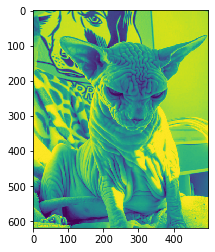

In [6]:
im_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
cv2.imwrite("../data/images/image_1_grayscale.jpg", im_gray)
plt.imshow(im_gray)
plt.show()